In [ ]:
# Ensembling (that you have learned in ML)
# Bagging
# Boosting

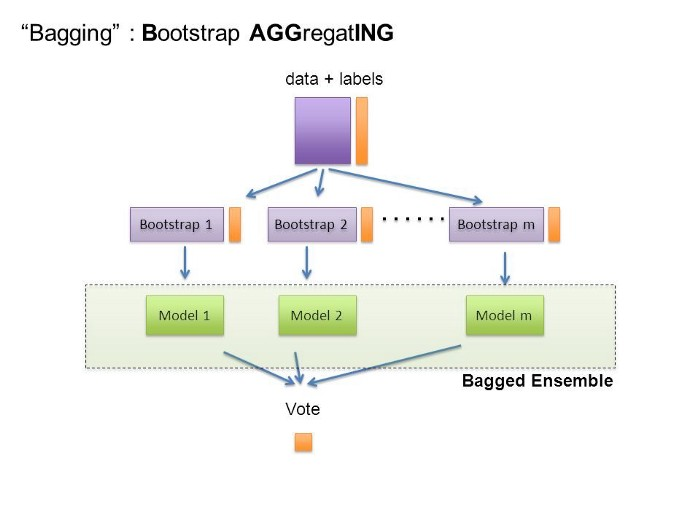

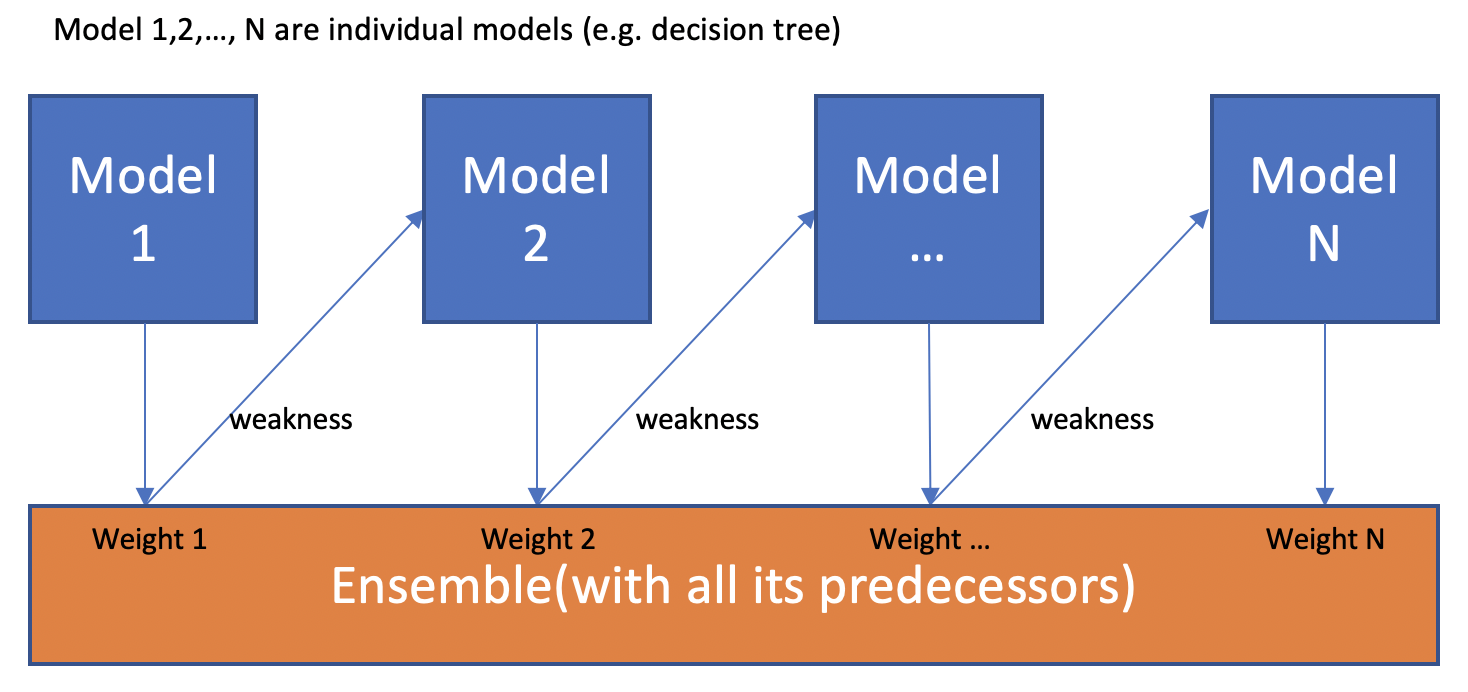

In [ ]:
# In bagging & boosting, the models used are of same family
# IN case of Random Forest, all models are Decision Trees

# But now we will learn about Ensembling where we can use any family of algorithm


# 1. Max Voting/ Voting Classifier
# Generally used for classification
# In this technique, multiple models are used to make prediction for each data points.
# The predictions by each model are considered as a vote,
# The predictions which get the majority of the model is declared as final answer


# 1.1 Hard
# 1.2 Soft


#     C1  C2  C3
# M1  0.7 0.2 0.1
# M2  0.2 0.6 0.2
# M3  0.6 0.2 0.2
# M4  0.6 0.2 0.2
# ------------------
# Average -

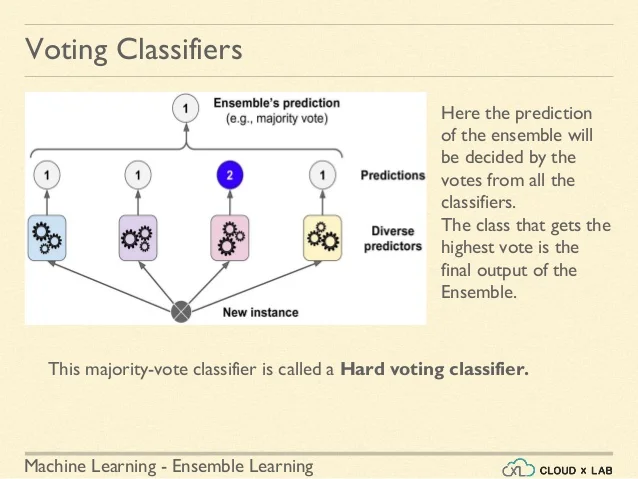

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X = iris.data[:, :4]

In [8]:
Y = iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
Y.shape

(150,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)#, random_state=42)

In [11]:
np.random.seed(12)
np.random.randint(0, 100, 1)

array([75])

In [12]:
models = []
models.append(("LR", LogisticRegression()))
models.append(('SVC', SVC(gamma='auto', probability=True)))
models.append(('DT', DecisionTreeClassifier()))

In [13]:
models

[('LR', LogisticRegression()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DT', DecisionTreeClassifier())]

In [14]:
from sklearn.ensemble import VotingClassifier

In [15]:
hard_vote = VotingClassifier(estimators=models, voting='hard')

In [16]:
hard_vote.fit(X_train, Y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DT', DecisionTreeClassifier())])

In [17]:
y_pred = hard_vote.predict(X_test)

In [18]:
y_pred

array([0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0])

In [19]:
Y_test

array([0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(Y_test, y_pred)

0.9333333333333333

In [ ]:
# While the hard_vote.predict is using the voting mechanism
# if you want to use the independent model
# you can get them by hard_vote.estimators_

In [22]:
hard_vote.estimators_

[LogisticRegression(),
 SVC(gamma='auto', probability=True),
 DecisionTreeClassifier()]

In [23]:
lr = hard_vote.estimators_[0]

In [24]:
lr.predict(X_test)

array([0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0], dtype=int64)

In [25]:
hard_vote.estimators_[1].predict(X_test)

array([0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0], dtype=int64)

In [26]:
hard_vote.estimators_[2].predict(X_test)

array([0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0], dtype=int64)

In [ ]:
# Soft Voting ...

In [27]:
soft_vote = VotingClassifier(estimators=models, voting='soft')

In [28]:
soft_vote.fit(X_train, Y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('DT', DecisionTreeClassifier())],
                 voting='soft')

In [29]:
y_pred_soft = soft_vote.predict(X_test)

In [30]:
y_pred_soft

array([0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0])

In [31]:
Y_test

array([0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0])

In [32]:
soft_vote.predict_proba(X_test)

array([[0.98011839, 0.01442988, 0.00545173],
       [0.00311   , 0.05060354, 0.94628645],
       [0.00875428, 0.98259137, 0.00865435],
       [0.00609963, 0.00820476, 0.98569561],
       [0.00604236, 0.94228461, 0.05167303],
       [0.97889114, 0.01560774, 0.00550112],
       [0.00498684, 0.89735211, 0.09766105],
       [0.97805222, 0.01522617, 0.00672161],
       [0.00722632, 0.85783824, 0.13493544],
       [0.97841548, 0.01572102, 0.0058635 ],
       [0.00369643, 0.15535957, 0.840944  ],
       [0.01635017, 0.97873342, 0.0049164 ],
       [0.00399969, 0.54405412, 0.45194619],
       [0.97312832, 0.02045578, 0.00641591],
       [0.98422297, 0.00695174, 0.00882528]])

In [33]:
from sklearn.ensemble import VotingRegressor

In [ ]:
# ?VotingRegressor

In [ ]:
# ML Lifecycle


# 1. Baseline model - Any simple model with no major hyper parameter
# You will have a baseline metrics to compare with your next robust models

# Example - BM gave you 65% accuracy, and you next RF model gave 78%

In [ ]:
# MLOps

In [ ]:
import os
os.listdir(".")

['.config', 'sample_data']

In [ ]:
! ls  -a

.  ..  .config	sample_data


In [ ]:
# Node.js & Python

In [ ]:
# How to convert a Python function into an URL

# def model_predict() ---> http://server.com/model/predict

In [ ]:
# 1. Build Model

# 2. Covert your model to an API
# How can we do this thing ?? --> Web Application

# FastAPI (https://fastapi.tiangolo.com/), Flask, Django

# 3. Web Server (gunicorn)

# 4. Proxy (Reverse Proxy) Nginx

# 5. Load Balancing (haproxy)

# 6. Queue (async)
# Queue - RabbitMQ, Redis, Kafka
# Celery

# 7. Caching

# Cloud Version (MS Azure ML Studio, AWS SageMaker)